In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

In [2]:
SALES_TRAIN_V2 = "data/sales_train_v2_fv2.csv"
SAMPLE_SUBMISSION = "data/sample_submission.csv"
TEST = "data/test_fv2.csv"
OUTPUT = "output"

In [3]:
# Dev dataset
sales_train = pd.read_csv(SALES_TRAIN_V2)

# Test & sample
sample_submission = pd.read_csv(SAMPLE_SUBMISSION)
test = pd.read_csv(TEST)

In [4]:
def rmse(y_true, y_pred):
    '''
    Root mean squared error.
    Parameters
    ----------
    y_true: ndarray
        Ground truth
    y_pred: ndarray
        Array of predictions
    Returns
    -------
    rmsle: float
        Root mean squared error
    References
    ----------
    .. [1] https://www.kaggle.com/wiki/RootMeanSquaredError
    '''

    # Check shapes
    #y_true, y_pred = align_shape(y_true, y_pred)
    return np.sqrt(((y_true - y_pred)**2).mean())

In [5]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,total_cat_cnt,min_cat_cnt,...,mean_cat_price,std_cat_price,min_shop_cnt,max_shop_cnt,mean_shop_cnt,std_shop_cnt,min_shop_price,max_shop_price,mean_shop_price,std_shop_price
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,203284.0,-3.0,...,434.289667,299.681484,-1.0,-1.0,1.166961,1.149310,0.10,32990.0,942.244232,1906.464127
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,13631.0,-1.0,...,1703.176031,1051.678052,-2.0,-2.0,1.144077,0.752636,0.07,32990.0,818.345743,1711.236198
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,13631.0,-1.0,...,1703.176031,1051.678052,-2.0,-2.0,1.144077,0.752636,0.07,32990.0,818.345743,1711.236198
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,13631.0,-1.0,...,1703.176031,1051.678052,-2.0,-2.0,1.144077,0.752636,0.07,32990.0,818.345743,1711.236198
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,8281.0,-1.0,...,1125.963251,550.847877,-2.0,-2.0,1.122260,0.802511,0.10,32990.0,743.052339,1544.768269
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,6611.0,-1.0,...,428.917476,378.836804,-2.0,-2.0,1.163508,1.026188,0.10,32997.5,884.981227,1815.446620
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,8281.0,-1.0,...,1125.963251,550.847877,-2.0,-2.0,1.122260,0.802511,0.10,32990.0,743.052339,1544.768269
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,348591.0,-2.0,...,286.209370,113.765602,-1.0,-1.0,1.823118,8.002811,4.00,27900.0,607.893809,833.904686
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,348591.0,-2.0,...,286.209370,113.765602,-1.0,-1.0,1.823118,8.002811,4.00,27900.0,607.893809,833.904686
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,348591.0,-2.0,...,286.209370,113.765602,-1.0,-1.0,1.823118,8.002811,4.00,27900.0,607.893809,833.904686


In [34]:
# Training dataset
def get_random_split():
    '''Returns a random split of sales_train_v2 dataset'''
    X = sales_train[['shop_id', 'item_id']].values
    y = sales_train['item_cnt_day'].values
    return train_test_split(X, y, test_size=.2)

In [36]:
X_train, X_test, y_train, y_test = get_random_split()

# Training
ctb = catboost.CatBoostRegressor(task_type='GPU', logging_level="Silent")
ctb.fit(X_train, y_train, cat_features=[0, 1])
y_pred = ctb.predict(X_test)

print "Result: {}".format(rmse(y_test, y_pred))


Result: 3.27357157189


## Experiment

In [37]:
N_TRIALS = 25

In [38]:
results = []
for i in xrange(N_TRIALS):
    print "Trial: ", i+1
    ctb = catboost.CatBoostRegressor(task_type='GPU', logging_level="Silent")
    X_train, X_test, y_train, y_test = get_random_split()
    
    # Training
    ctb.fit(X_test, y_test, cat_features=[0, 1])
    y_pred = ctb.predict(X_test)
    result = rmse(y_test, y_pred)
    print "Result: ", result
    results.append(result)
    

Trial:  1
Result:  3.45693221675811
Trial:  2
Result:  1.7796687230184767
Trial:  3
Result:  3.671146781663743
Trial:  4
Result:  4.552291019274759
Trial:  5
Result:  2.443435039740195
Trial:  6
Result:  2.1009599363390783
Trial:  7
Result:  1.7043049754306812
Trial:  8
Result:  1.9868262669654602
Trial:  9
Result:  2.0062857872714415
Trial:  10
Result:  2.251756314204982
Trial:  11
Result:  2.140804862715276
Trial:  12
Result:  2.124708896985644
Trial:  13
Result:  1.7447295675224876
Trial:  14
Result:  3.258630714118531
Trial:  15
Result:  1.9790946924201869
Trial:  16
Result:  1.8586190138390248
Trial:  17
Result:  2.0423835431067183
Trial:  18
Result:  1.9516691098911727
Trial:  19
Result:  1.8266815207798102
Trial:  20
Result:  3.584914845216892
Trial:  21
Result:  3.5294133927199463
Trial:  22
Result:  2.2392167013667286
Trial:  23
Result:  3.6827128559266136
Trial:  24
Result:  3.4469725791004944
Trial:  25
Result:  2.205215671375279


In [39]:
np.mean(results)

2.542775001110069

<Container object of 25 artists>

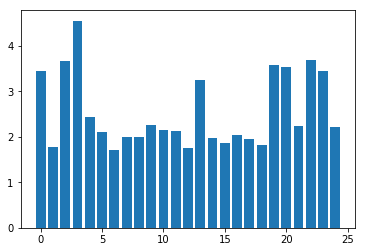

In [41]:
plt.bar(range(len(results)), results)

## Kaggle submission

In [42]:
X = sales_train[['shop_id', 'item_id']].values
y = sales_train['item_cnt_day'].values

X, y = shuffle(X, y)

ctb = catboost.CatBoostRegressor(task_type='GPU', logging_level="Silent")
    
# Training
ctb.fit(X_test, y_test, cat_features=[0, 1])

In [45]:
test_ids = test['ID']
X_test = test[['shop_id', 'item_id']].values

In [46]:
res = ctb.predict(X_test)

In [58]:
submission = pd.DataFrame([test_ids, res]).T
submission.columns = ["ID", "item_cnt_month"]
submission.ID = submission.ID.astype(int)

In [62]:
submission.to_csv("baseline.csv", index=None)